In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

df = pd.read_csv('../data/raw/UCI_Credit_Card.csv', header=0)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [10]:
df.rename(columns={'default.payment.next.month': 'TARGET'}, inplace=True)
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True) 


print(f"Dimensions du dataset : {df.shape}")
print("-" * 30)
df.info()

Dimensions du dataset : (30000, 25)
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 no

In [11]:
df.drop('ID', axis=1, inplace=True)

In [12]:
df.describe()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TARGET
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Répartition target( %) :
TARGET
0    77.88
1    22.12
Name: proportion, dtype: float64


C:\Users\mohme\AppData\Local\Temp\ipykernel_1240\1668909926.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TARGET', data=df, palette='viridis')


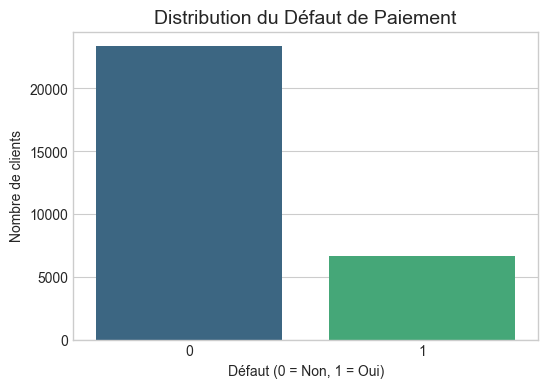

In [13]:
target_counts = df['TARGET'].value_counts(normalize=True) * 100
print("Répartition target( %) :")
print(target_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=df, palette='viridis')
plt.title('Distribution du Défaut de Paiement', fontsize=14)
plt.xlabel('Défaut (0 = Non, 1 = Oui)')
plt.ylabel('Nombre de clients')
plt.show()

### il y a un desequilibre dans la variable cible TARGET alors l'accuracy n'est pas une option

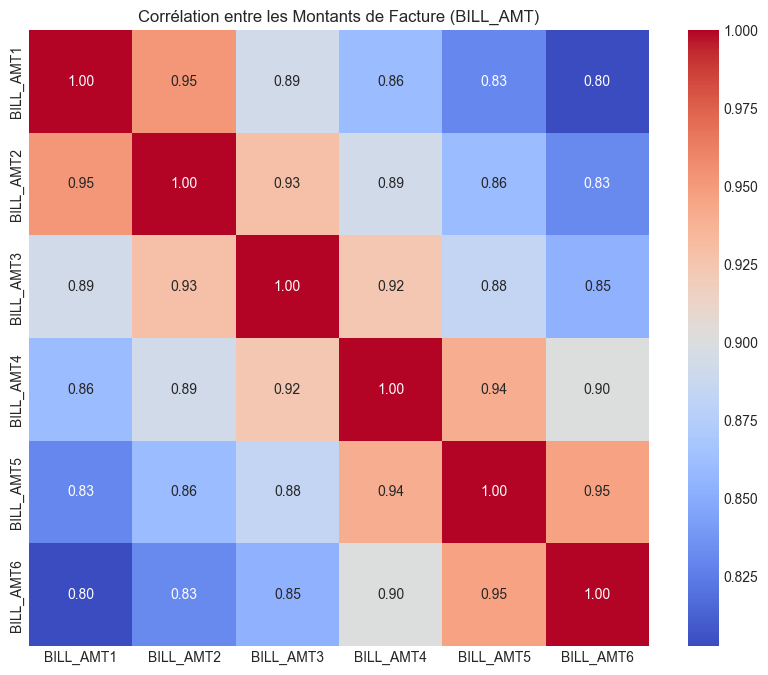

In [ ]:
#on va voire si les bill sont correler entre eux

bills = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

plt.figure(figsize=(10, 8))
sns.heatmap(bills.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre les Montants de Facture (BILL_AMT)")
plt.show()

In [15]:
# On sauvegarde le travail préliminaire (Renommage + Drop ID)
df.to_csv('../data/interim/df_ready_for_cleaning.csv', index=False)

print("Checkpoint sauvegardé : data/interim/df_ready_for_cleaning.csv")

Checkpoint sauvegardé : data/interim/df_ready_for_cleaning.csv


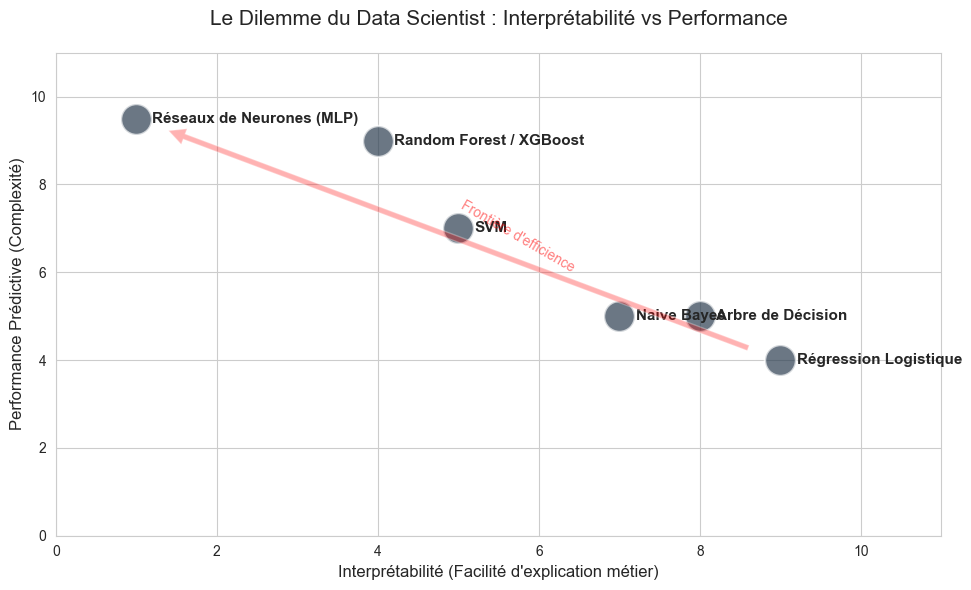

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Données théoriques pour l'illustration
models = ['Régression Logistique', 'Arbre de Décision', 'Naive Bayes', 'SVM', 'Random Forest / XGBoost', 'Réseaux de Neurones (MLP)']
interpretability = [9, 8, 7, 5, 4, 1]  # Score sur 10 (Haut = Facile à expliquer)
performance =      [4, 5, 5, 7, 9, 9.5] # Score sur 10 (Haut = Précis)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Création du Scatter Plot
scatter = sns.scatterplot(x=interpretability, y=performance, s=500, color='#2c3e50', alpha=0.7)

# Ajout des labels
for i in range(len(models)):
    plt.text(interpretability[i]+0.2, performance[i], models[i], 
             fontsize=11, weight='bold', verticalalignment='center')

# Esthétique
plt.title("Le Dilemme du Data Scientist : Interprétabilité vs Performance", fontsize=15, pad=20)
plt.xlabel("Interprétabilité (Facilité d'explication métier)", fontsize=12)
plt.ylabel("Performance Prédictive (Complexité)", fontsize=12)
plt.xlim(0, 11)
plt.ylim(0, 11)

# Inversion axe X pour montrer que + c'est complexe, - c'est interprétable (Optionnel, ici on garde standard)
# On ajoute une flèche pour montrer la tendance
plt.annotate('', xy=(1, 9.5), xytext=(9, 4),
             arrowprops=dict(facecolor='red', shrink=0.05, alpha=0.3))
plt.text(5, 6, "Frontière d'efficience", rotation=-30, color='red', alpha=0.5)

plt.tight_layout()
plt.show()